# K Means Clustering Algorithms

In [41]:
# Import dataset
from sklearn.datasets import make_blobs

In [74]:
# Preprocessing tools
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

# Hidden warnings
import warnings
warnings.filterwarnings('ignore')

# Models
import threadpoolctl
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from kneed import KneeLocator

# Metrics 
from sklearn.metrics import silhouette_score

In [68]:
!pip install kneed

### Generating sample data

In [59]:
X, y = make_blobs(n_samples=3000, centers=3, n_features=2, random_state=31)

In [60]:
X

array([[-5.59773468,  9.79213748],
       [ 2.7797693 ,  9.84149195],
       [-6.11221716,  9.16498184],
       ...,
       [ 3.20855087,  8.77542711],
       [ 4.96581024, 11.20341357],
       [ 4.1257931 ,  9.74774506]])

In [61]:
y

array([0, 1, 0, ..., 1, 1, 1])

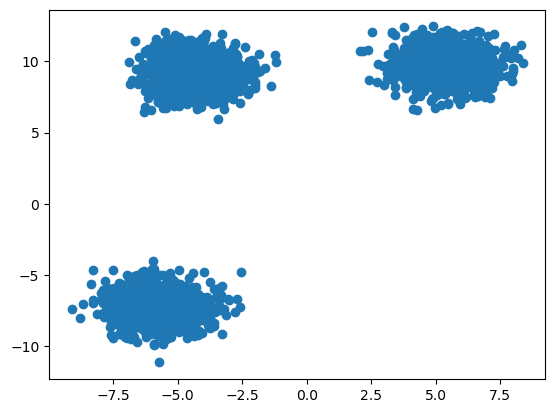

In [62]:
plt.scatter(X[:, 0], X[:, 1])

### Splitting Data

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Elbow Method to Select K Value

#### Elbow method
Use the method to find the optimal number of clusters, it helps identify the "elbow" point on the graph, which indicates a good balance between capturing distict groups and avoiding overfitting.

In [54]:
# wcss=[]
# for k in range (1, 11):
#     kmeans=KMeans(n_clusters=k, init='k-means++')
#     kmeans.fit(X_train)
#     wcss.append(kmeans.inertia_)

In [55]:
# Plot the WCSS values
# plt.plot(range(1, 11), wcss)
# plt.xlabel('Number of Clusters (k)')
# plt.ylabel('WCSS')
# plt.title('Elbow Method')
# plt.show()

In [64]:
kmeans = KMeans(n_clusters=3, init="k-means++")

In [65]:
y_labels = kmeans.fit_predict(X_train)

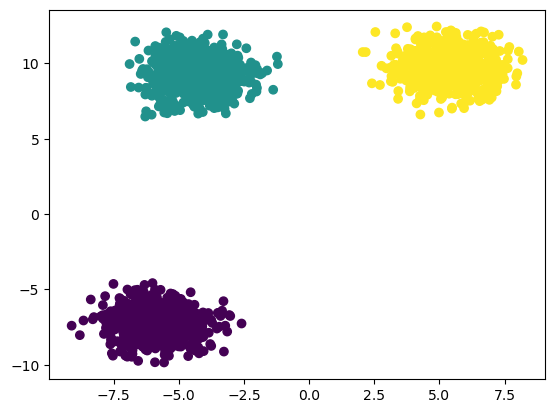

In [66]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_labels)

In [73]:
# k1 = KneeLocator(range(1, 11), wcss, curve='convex', direction='decreasing')
# k1.elbow

### Silhoutte Score

In [77]:
from sklearn.metrics import silhouette_score

In [82]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train, kmeans.labels_)
    silhouette_coefficients.append(score)

In [83]:
silhouette_coefficients

[0.754271640080085,
 0.8406171540012713,
 0.6718018990787372,
 0.5042468673120867,
 0.32544088652545805,
 0.33475321792077534,
 0.3406585011264917,
 0.34556076658332563,
 0.33622319569353853]

<function matplotlib.pyplot.show(close=None, block=None)>

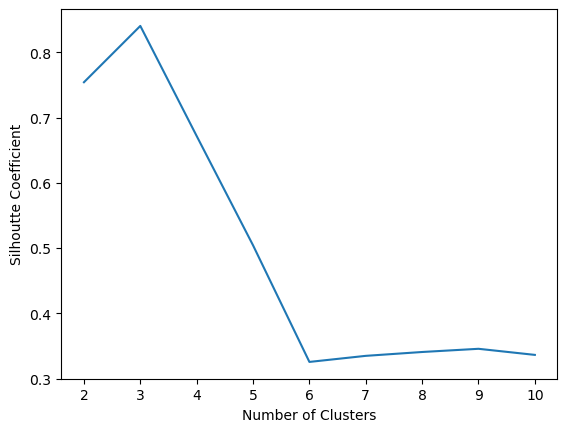

In [86]:
# Plotting silhouette_coefficients score
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhoutte Coefficient")
plt.show